# Logistic Regression

### Import library required

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Import Data

Digits Data:
1797 Rows
64 Columns


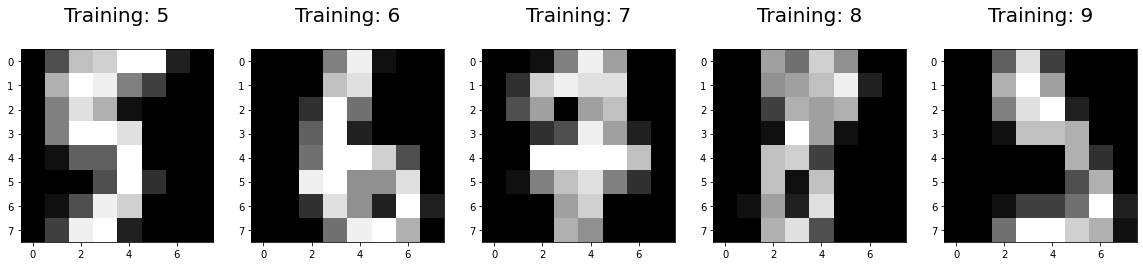

In [5]:
digits = load_digits()
print('Digits Data:')
print(digits.data.shape[0], 'Rows')
print(digits.data.shape[1], 'Columns')

plt.figure(figsize=(20,4))

for i, (image, label) in enumerate(zip(digits.data[15:20], digits.target[15:20])):
    plt.subplot(1,5,i+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

In [6]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

### Split Data and Make Model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.20)

clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Test to Predict Data

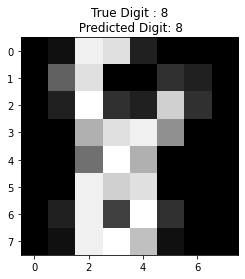

In [30]:
i = 1
predDigit = clf.predict(X_test[i].reshape(1,-1))[0]

plt.figure()
plt.imshow(X_test[i].reshape(8,8), cmap=plt.cm.gray)
plt.title('True Digit : {}\n Predicted Digit: {}'.format(y_test[i],predDigit));

### Check Accuracy and Make Confusion Matrix

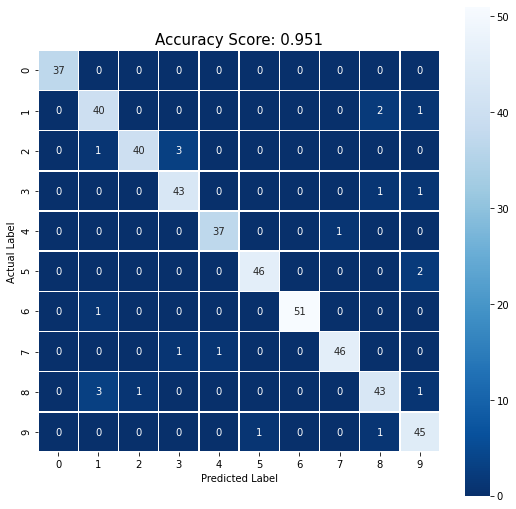

In [64]:
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='d', square=True, cmap='Blues_r', linewidth=0.5)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Accuracy Score: {:.3}'.format(accuracy), size=15);

In [31]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20)

clf = LogisticRegression()
clf.fit(X_train, y_train)

print('Accuracy: ', clf.score(X_test, y_test))

Accuracy:  0.9611111111111111


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
